In [2]:
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 14s 1us/step


**Note:**  
* The argument ${\color{blue}{num\_words=10000}}$ keeps the top 10,000 most frequently occurring words in the training data.

## 1. Explore the data

In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


**Note:**  
* Each label is an integer value of either 0 or 1, where 0 is a negative review and 1 is a positive review.  
  (각 label은 정수값 0과 1을 가진다. 여기서 0은 부정적인 리뷰, 1은 긍정적인 리뷰이다.)

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


**Note:**
* The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary  
  (리뷰 내용들은 정수들로 변환되어 있다. 각각의 정수들은 (특별한) 사전 속의 특별한 단어를 뜻한다.)

In [6]:
len(train_data[0]), len(train_data[1])

(218, 189)

**Important:**  
* Movie reviews may be different lengths. The above code shows the number of words in the first and second reviews. Since inputs to a neural network must be the same length, we'll need to resolve this later.  
  (리뷰들은 길이이가 다를 것이다. 신경망에 들어가는 input 데이터는 같은 길이를 가지고 있어야 한다.)

### Convert the integers back to words

In [7]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 6s 3us/step


In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 2. Prepare the data

The reviews must be converted to tensors before fed into the neural network.   

This conversion can be done a couple ways:
    1. One-Hot Encode  
       This approach is memory intensive, requiring a num_word * num_reviews size matrix
    
    2. Pad Sequences
       all reviews have the same length, then create an integer tensor of shape num_reviews * max_length.

In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], 
                                                        padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], 
                                                        padding='post', maxlen=256)

In [10]:
len(train_data[0]), len(test_data[0])

(256, 256)

In [11]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

**Observe:**
* train_data[0]의 원래 길이는 218이였는데, 256으로 길이를 같게 하면서 나머지는 0으로 덧됨

## Build the model

he neural network is created by stacking layers—this requires two main architectural decisions:
* How many layers to use in the model?
* How many hidden units to use for each layer?

In [12]:
# input shape is the vocabulary count used for the moview reviews(10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


The Layer

1. Embedding layer.  
  This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).

2. GlobalAveragePooling1D layer   
  a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model can handle input of variable length, in the simplest way possible.

3. This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.

4. The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probabilty, or confidence level.

Hidden Units

The number of outputs (units, nodes , or neurons) is the dimension of the representational space for the layer. In other words, the amount of freedom the network is allowed when learning an internal representation.

## 3. Compile the model

Loss Function

binary_crossentropy is better for dealing with out probabilities  
it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions.

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

## 4. Train the model

### split a validation set

In [15]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [16]:
hist = model.fit(partial_x_train, partial_y_train,
                epochs=40, batch_size=512,
                validation_data=(x_val, y_val),
                verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 46us/step - loss: 0.6925 - acc: 0.5199 - val_loss: 0.6907 - val_acc: 0.5504
Epoch 2/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.6888 - acc: 0.5645 - val_loss: 0.6875 - val_acc: 0.6042
Epoch 3/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.6849 - acc: 0.6154 - val_loss: 0.6840 - val_acc: 0.6435
Epoch 4/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.6800 - acc: 0.6640 - val_loss: 0.6803 - val_acc: 0.5630
Epoch 5/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.6738 - acc: 0.6944 - val_loss: 0.6722 - val_acc: 0.7079
Epoch 6/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.6651 - acc: 0.7314 - val_loss: 0.6629 - val_acc: 0.7186
Epoch 7/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.6531 - acc: 0.7487 - val_loss: 0.6506 - val_acc

## 5. Evaluate the model

In [17]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 23us/step
[0.3048398605728149, 0.87472]


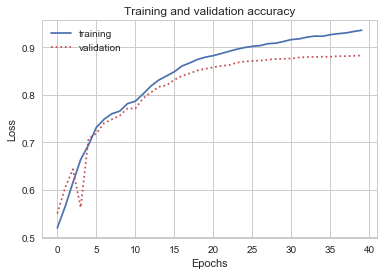

In [20]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Note:**
* trainig loss decreases and accuracy increases with each epoch.
  This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration. 
  
  
* This isn't the case for the validation  
  they seem to peak after about twenty epochs.
  
  
* This is an example of overfitting (do not generalize to test data)

* For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs.   
  (how to do this automatically with a callback.)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()